# Machine Learning Preparation



**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.2
pandas version :  1.1.3
seaborn version :  0.11.0


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [3]:
data = pd.read_csv('Product_Exclusive_Classification.csv')
data.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


## Describe Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [5]:
m = data.shape[0]
n = data.shape[1]

print("Number of rows: " + str(m))
print("Number of columns: " + str(n))

Number of rows: 8000
Number of columns: 9


In [6]:
# check missing values
data.isnull().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [4]:
# drop nan
data = data.dropna()

In [5]:
# check duplicates
print("Number of duplicated data:", data.duplicated().sum())
print("Number of duplicated ID:", data["id"].duplicated().sum())

Number of duplicated data: 0
Number of duplicated ID: 46


In [6]:
data_div = data.copy()

# separate features and target
label=data_div['exclusive']
numericals = data_div.drop(['exclusive'], axis=1).select_dtypes(include=['number'])
categoricals = data_div.select_dtypes(exclude=['number'])

print("label column:", label.name)
print("__________________________")
print("numerical columns:\n", numericals.columns)
print("__________________________")
print("categorical columns:\n", categoricals.columns)

label column: exclusive
__________________________
numerical columns:
 Index(['id', 'rating', 'number_of_reviews', 'love', 'price', 'value_price'], dtype='object')
__________________________
categorical columns:
 Index(['brand', 'category'], dtype='object')


# Exploratory Data Analysis (EDA)

## Pendekatan Numerik

In [24]:
numericals.describe()

,id,rating,number_of_reviews,love,price,value_price
count,7.828000e+03,7828.000000,7828.000000,7.828000e+03,7828.000000,7828.000000
mean,1.921029e+06,4.083866,301.762775,1.752500e+04,49.796917,50.984182
std,3.759783e+05,0.760909,935.028844,4.445544e+04,46.803933,48.440669
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000
25%,1.787153e+06,4.000000,14.000000,2.000000e+03,24.000000,24.000000
50%,2.032803e+06,4.000000,55.000000,5.400000e+03,35.000000,35.000000
75%,2.186629e+06,4.500000,229.000000,1.530000e+04,58.000000,60.000000
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.000000


In [25]:
categoricals.describe()

,brand,category
count,7828,7828
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,490,592


<font color="darkblue">
    <ul><b><i>
        <li>There is a significant difference between mean and median of 'number_of_reviews' and 'love' indicating skewed distribution</li>
    </i></b></ul>
</font>

## Pendekatan Grafis

### Univariate Analysis

#### a. Countplot

In [26]:
label.value_counts()

0    5793
1    2035
Name: exclusive, dtype: int64

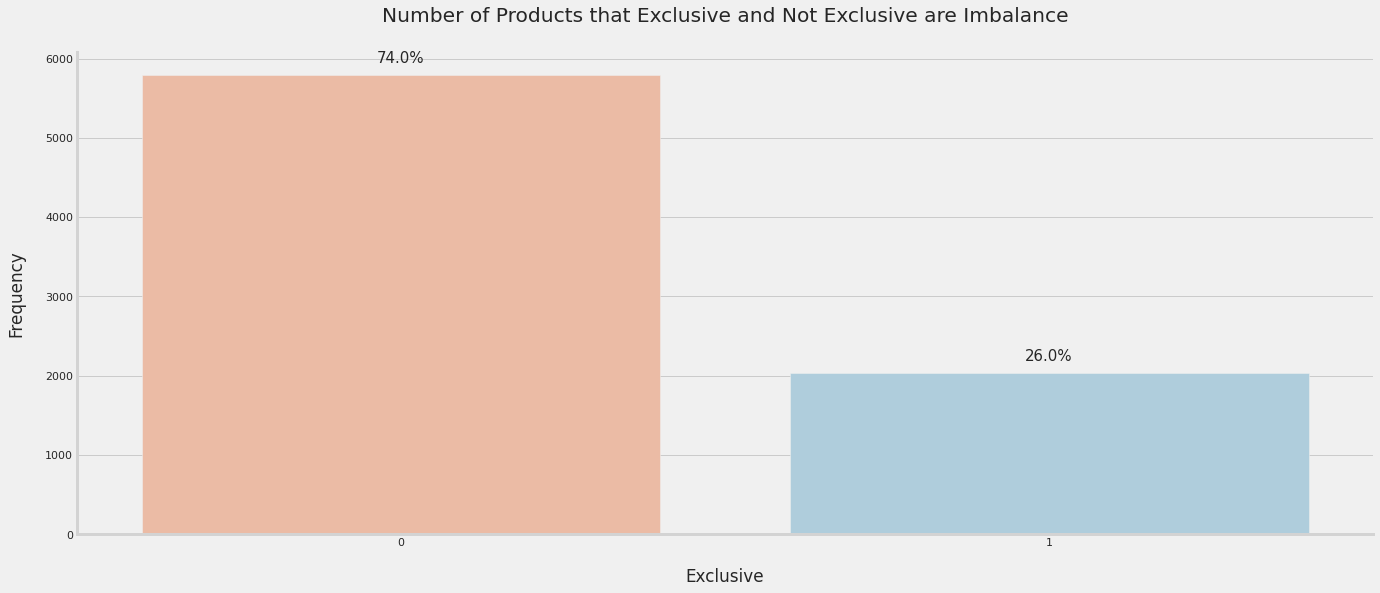

In [40]:
# plot
ax = sns.countplot(label, palette='RdBu')

total = float(len(label))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 150
    ax.annotate(percentage, (x, y), ha='center', fontsize=15)
    
# settings
plt.xlabel('Exclusive', labelpad = 20)
plt.ylabel('Frequency', labelpad = 20)
plt.title('Number of Products that Exclusive and Not Exclusive are Imbalance', pad = 30)
sns.despine(top=True, right=True, left=False, bottom=False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

<font color="darkblue">
    <ul><b><i>
        <li>The graph above shows that exclusive categories have an imbalanced frequency</li>
    </i></b></ul>
</font>

#### b. Boxplot

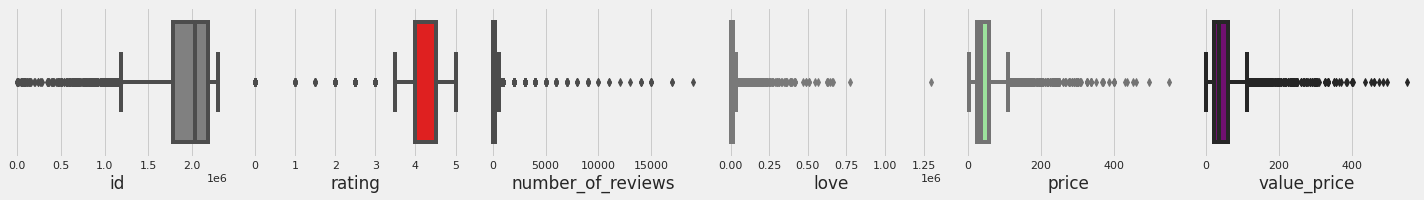

In [28]:
plt.figure(figsize=(20,3))
for i,colour in zip(range(0, len(numericals.columns)),['grey','red','yellow','lightblue','lightgreen','purple']):
    plt.subplot(1,len(numericals.columns),i+1)
    sns.boxplot(numericals[numericals.columns[i]], color=colour)
    plt.tight_layout()

<font color="darkblue">
    <ul><b><i>
        <li>The boxplot graphs above show that 'id' and 'rating' have a distribution affected by outliers shown on the graph. The outliers are piled up at the left end</li>
        <li>'number_of_reviews', 'love', 'price', and 'value_price' have a distribution affected by outliers shown on the graph. The outliers are piled up at the right end</li>
    </i></b></ul>
</font>

#### c. Distplots

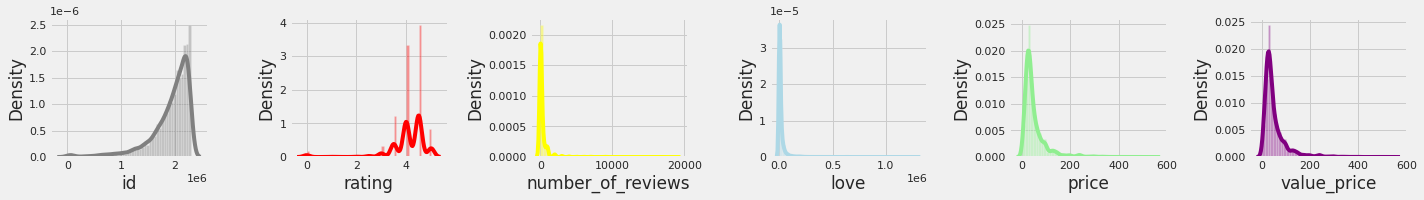

In [29]:
plt.figure(figsize=(20,3))
for i,colour in zip(range(0, len(numericals.columns)),['grey','red','yellow','lightblue','lightgreen','purple']):
    plt.subplot(1,len(numericals.columns),i+1)
    sns.distplot(numericals[numericals.columns[i]], color=colour)
    plt.tight_layout()

<font color="darkblue">
    <ul><b><i>
        <li>The distribution plots above show that 'number_of_reviews', 'love', 'price', and 'value_price' have a skewed right (positively skewed) distribution where the data are piled up at the left end. There is a very small portion of the data collected on right side (outliers). It causes the mean > median</li>
        <li>'id' has a skewed left (negatively skewed) distribution where the data are piled up at the right end. There is a very small portion of the data collected on left side (outliers). It causes the mean < median </li>
        <li>'rating' tends to have a multimodal distribution shown by multiple modes/peaks indicating there are different groups for each that rating feature</li>
    </i></b></ul>
</font>

### Multivariate Analysis

#### a. Pair Grid

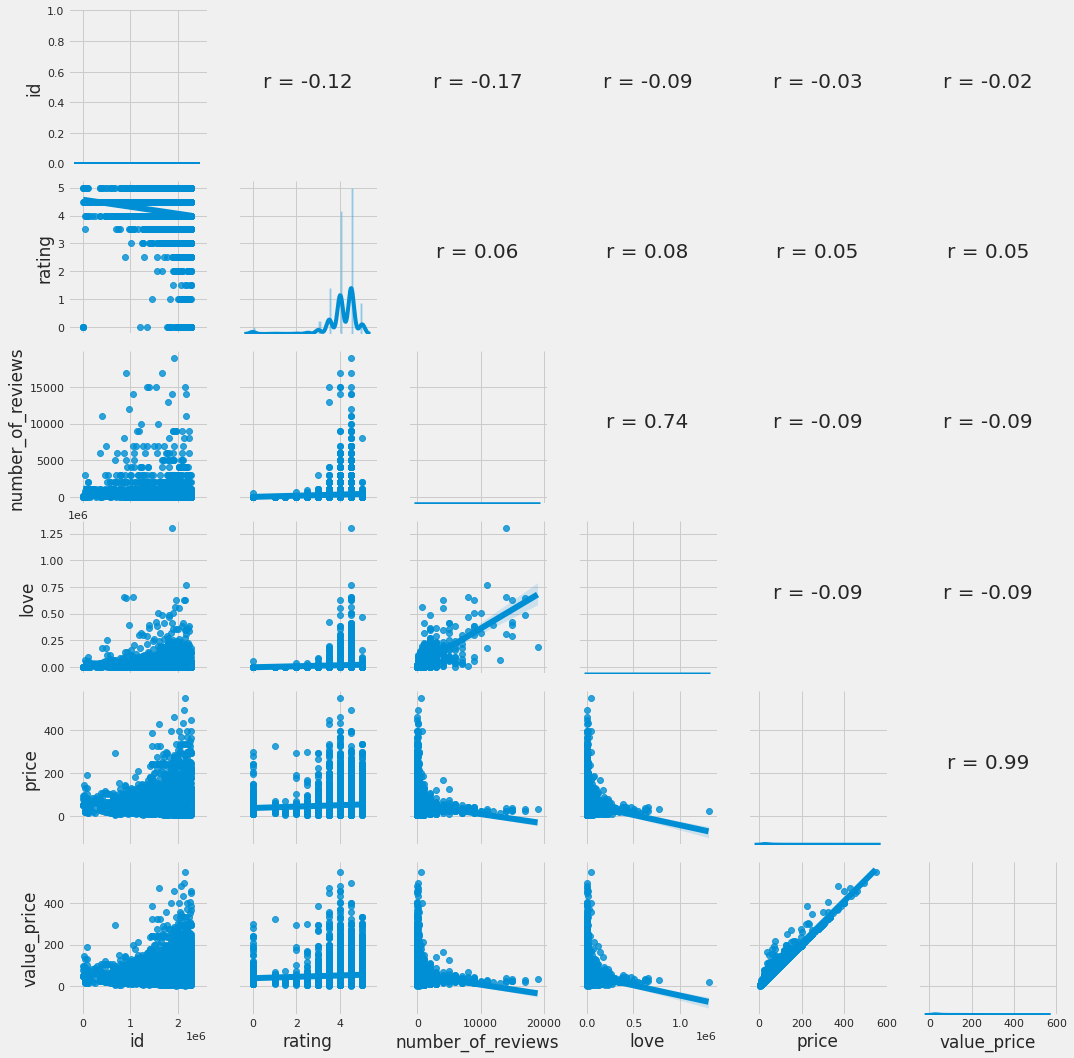

In [42]:
from scipy.stats import pearsonr

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center', size=20)
    ax.set_axis_off()

g = sns.PairGrid(data=numericals)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef);

<font color="darkblue">
    <ul><b><i>
        <li>There are no clear clusters shown on graph</li>
    </i></b></ul>
</font>

#### b. Pair plot + Hue

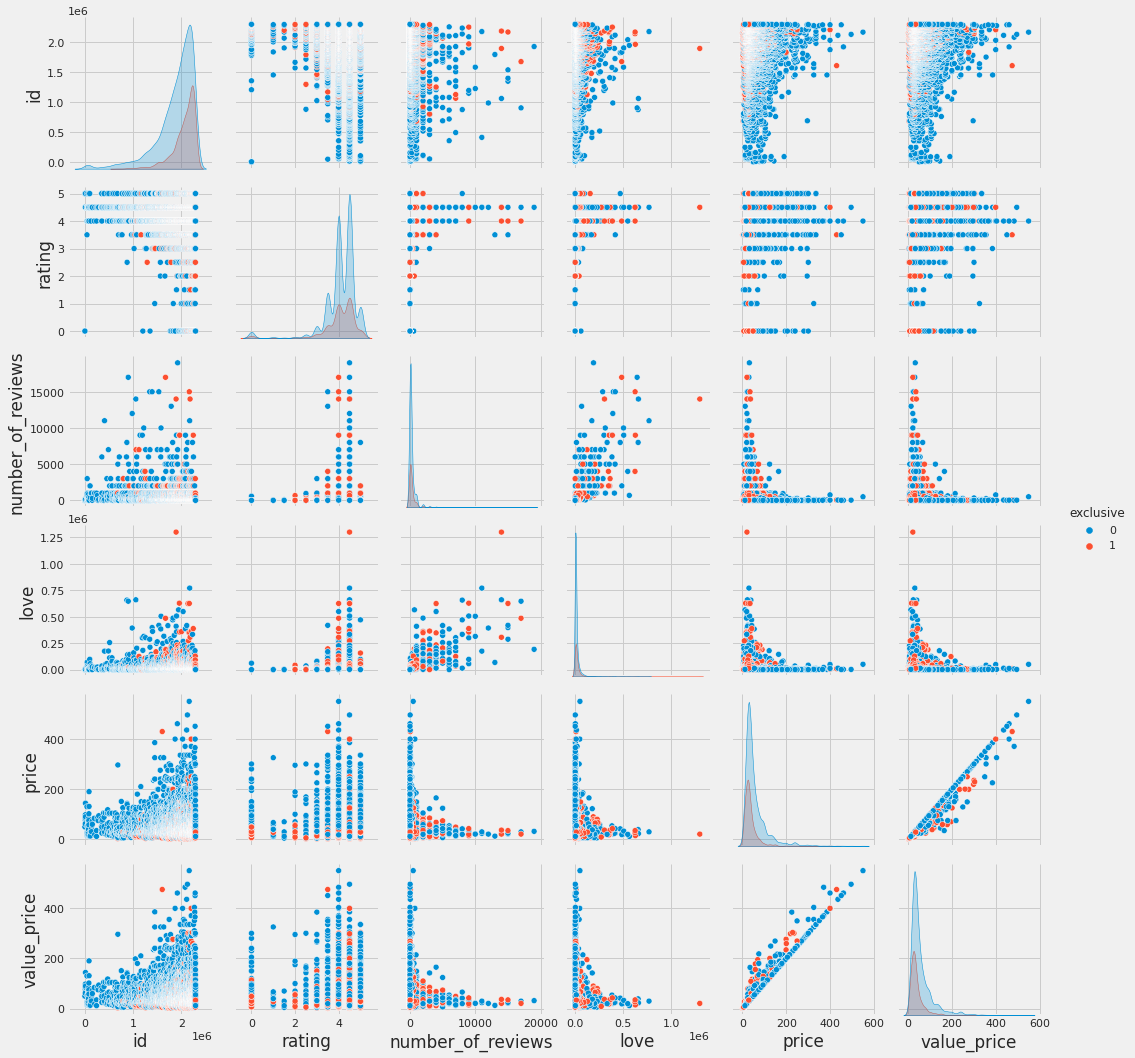

In [32]:
sns.pairplot(data=data_div, hue = "exclusive");

<font color="darkblue">
    <ul><b><i>
        <li>There are no well separated exclusive categories indicating a good combination of features</li>
    </i></b></ul>
</font>

#### c. Correlation Heatmap

In [46]:
# compute corr
numericals.corr(method = "pearson")

,id,rating,number_of_reviews,love,price,value_price
id,1.000000,-0.123551,-0.167514,-0.086259,-0.034342,-0.021255
rating,-0.123551,1.000000,0.064871,0.080416,0.054228,0.052259
number_of_reviews,-0.167514,0.064871,1.000000,0.743997,-0.086570,-0.089185
love,-0.086259,0.080416,0.743997,1.000000,-0.090973,-0.091237
price,-0.034342,0.054228,-0.086570,-0.090973,1.000000,0.987795
value_price,-0.021255,0.052259,-0.089185,-0.091237,0.987795,1.000000


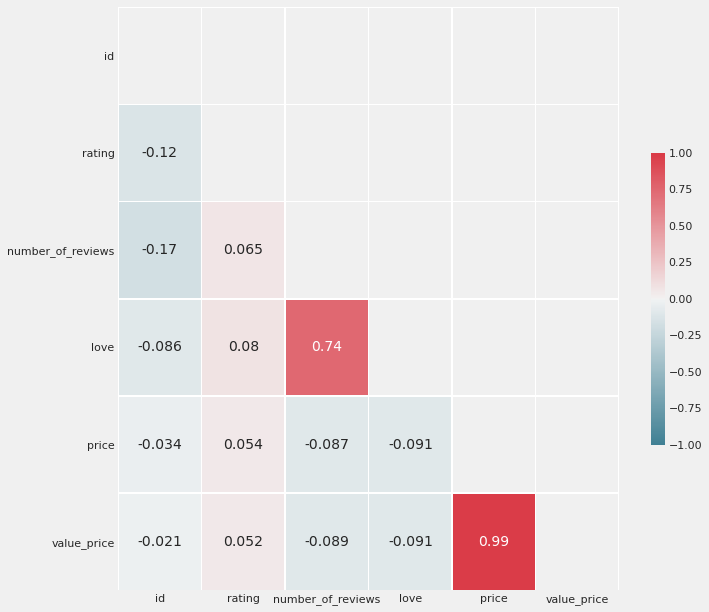

In [57]:
# compute correlation 
corr = numericals.corr(method = "pearson")

# mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# set figure size
f, ax = plt.subplots(figsize = (10,10))

# set colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, 
           vmin = -1, vmax = 1, center = 0,
           linewidths = .5, cbar_kws = {"shrink": .5}, annot = True);

<font color="darkblue">
    <ul><b><i>
        <li>There are redundant features having strong correlated features, that are 'price' vs 'value_price' and 'love' vs 'number_of_reviews'</li>
    </i></b></ul>
</font>

## insight

<font color="darkblue">
    <ul><b><i>
        Overall, all features have data whose values differ significantly between the mean and median (skewed distribution). There is a strong correlation between price and value_price, meaning that value_ price and 'love' have the same contribution to the dependent variable / feature target (exclusive label), we can use just one of these features, as well as the correlation between love 'and' number_of_reviews' which also have a strong correlation.
    </i></b></ul>
</font>

# Data Preparation

In [7]:
# drop redundant features

cols = ['value_price','number_of_reviews']
data_clean = data_div.copy()
data_clean = data_clean.drop(cols, axis=1)
data_clean.head()

,id,brand,category,rating,love,price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,0.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,50.0,0


## Normalization/Standardization

In [8]:
from sklearn.preprocessing import MinMaxScaler

norm_columns = ['id','rating','love','price']

for i in norm_columns:
    data_clean[i] = MinMaxScaler().fit_transform(data_clean[i].values.reshape(len(data_clean),1))

data_clean.head()

,id,brand,category,rating,love,price,exclusive
0,0.000000,SEPHORA COLLECTION,no category,1.0,0.0,0.087751,0
1,0.000111,SEPHORA COLLECTION,no category,0.0,0.0,0.087751,0
2,0.000154,SEPHORA COLLECTION,no category,0.0,0.0,0.087751,0
3,0.000171,SEPHORA COLLECTION,no category,0.0,0.0,0.087751,0
4,0.000180,SEPHORA COLLECTION,no category,0.0,0.0,0.087751,0


## Feature encoding

In [9]:
# One-hot Encoding
def onehot_encode(data, column):
    dummies = pd.get_dummies(data[column], prefix=column)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(column, axis=1)
    return data

for column in ['brand','category']:
        data_clean = onehot_encode(data_clean, column=column)

data_clean.head(3)

,id,rating,love,price,exclusive,brand_8Greens,brand_AERIN,brand_ALTERNA Haircare,brand_AMOREPACIFIC,brand_Acqua Di Parma,...,category_Skincare Sets,category_Spa Tools,category_Sponges & Applicators,category_Sunscreen,category_Teeth Whitening,category_Tinted Moisturizer,category_Toners,category_Tweezers & Eyebrow Tools,category_Value & Gift Sets,category_no category
0,0.000000,1.0,0.0,0.087751,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.000111,0.0,0.0,0.087751,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.000154,0.0,0.0,0.087751,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Class imbalance

In [10]:
# separate features and target
X = data_clean.drop(['exclusive'], axis=1).values
y = data_clean['exclusive'].values

In [11]:
from imblearn import over_sampling
X_over,y_over = over_sampling.RandomOverSampler().fit_resample(X,y)
print(X_over.shape)
print(y_over.shape)

(11586, 456)
(11586,)


# conclusion

<font color="darkblue">
    <ul><b><i>
        After finding out that the features have an distribution that are not normal, a normalisation process is carried out so that the learning algorithm treats all features fairly and makes it easier to interpret several ML models. Then feature encoding is carried out so that all feature categories can be used for modeling. We also handle the imbalance class because based on our assumption, the distribution of unique values ​​on the target (exclusive) is unequal, 74% vs 26%
    </i></b></ul>
</font>